### Additional exercises on Manifold learning 

#### Exercise 1. Nested motions

__Part I.__ Multidimensional scaling, which preserves the inner products, can be done with the usual Euclidean product. It can also be applied by replacing the inner product with a kernel. In this case the matrix $\mathbf{S}$ from which we compute the eigenvalue decomposition in classical MDS, is replace by the kernel matrix $\mathbf{K}$. In this exercise, we will use the Gaussian kernel, $k(\mathbf{x}^{(i)}, \mathbf{x}^{(j)}) = \exp(-\frac{1}{2\sigma}\|\mathbf{x}^{(i)} - \mathbf{x}^{(j)}\|^2)$

By relying on kernel based MDS, we want to see if we can capture a simple circular motion. Generate a sequence of images of a rotating object. take for example ech frame to be the rotation of the letter T. (construct the image as a 0/255 numpy array) and use the function rotate from scipy to generate the rotations. Then display the manifold by relying on kernel based MDS. 

In [ ]:
from scipy.ndimage import rotate

# put your code here

__Part II.__ We want to extend the ideas above to be able to disentangle motions. Add another rotating object on top of the rotation 'T' from above. Let us say a rotation 'U' for example. Make this U smaller and located sufficiently far from the T on each frame. Then study the resulting manifold that you can obtain in the 2D space.    

#### Exercise 2. Denoising and compresion

We would like to use kernel based MDS to improve the compression of images. Consider the set of images below which are generated as rotations of an image of the number 7 from the MNIST dataset. If you can't download MNIST, you can load the image directly from github. 

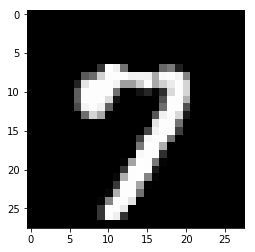

In [27]:
import numpy as np
import matplotlib.pyplot as plt


seven = np.load('MNISTseven.npy')
plt.imshow(seven, cmap='gray', vmin=0, vmax=255)
plt.show()

__Part I.__ We want to reproduce the results of the paper of 
[Poddar and Jacob](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=7163877&casa_token=sv9yFWIkdSUAAAAA:jSwcBZhkR0hhztXANJmJr-nGzD2nB0FVaD2GzuosMRj-e7LAu5fGUMBUAlMegzRD2xfs3uyk4w&tag=1). Start by generating a sufficiently large number of rotations of the original image. You can do this using scipy or openCV.

In [ ]:
import imutils
import cv2
from scipy.ndimage import rotate

# put your code and display the result here 

__Part II.__ The main idea of the paper is to use the manifold information to reconstruct the images, even when only having access to a subsampled version of those images. Define a sampling operator which retains 90% of the images at random. Take a different sampling pattern (i.e. generate a new set of samples) for each frame in you database. Store the results in a measurements matrix. 

To denoise we will rely on the graph laplacian as follows. From the set of original images, we build a graph $\mathcal{G} = (\mathcal{V}, \mathcal{E})$, where the edge weights are defined as

\begin{align}
\mathbf{w}_{i,j} = \left\{\begin{array}{ll}
e^{-\frac{1}{\sigma^2}\|\mathbf{y}_i - \mathbf{y}_j\|^2}& \text{if $\|\mathbf{y}_i - \mathbf{y}_j\|_2^2< t$}\\
0 & \text{otherwise}
\end{array}\right.
\end{align}

where $\mathbf{y}_j$ are the results of the sampling operator. 

Given a weighted graph, the Laplacian matrix of the graph can be defined as

\begin{align}
\mathbf{L}_{ij} = \left\{\begin{array}{ll}
                         -w_{ij}&\text{if $i\sim j$}\\
                         w_{i}&\text{if $i= j$}\\
                         0 & \text{otherwise}
                         \end{array}\right.
\end{align}
$w_i = \sum_{j\sim i}w_{ij}$ is the sum of the weights of the edges incident to vertex $i$. Build the Laplacian of the graph. for the collection of rotated images. 

In [ ]:
# put the code here



Given the sampled images we can then compute the factorization of the Laplacian $\mathbf{L} = \mathbf{Q}\mathbf{Q}^T$ (use the eigenvalue decomposition) and solve the following recovery program. 

\begin{align}
\mathbf{x}^{(i),*} = \underset{\mathbf{x}^{(i)}}{\operatorname{argmin}} \sum_{i=1}^N \|\mathbf{A}^{(i)}\mathbf{x}^{(i)} - \mathbf{b}^{(i)}\|^2_F + \lambda \|\mathbf{X}\mathbf{Q}\|_F^2
\end{align}

where the 

Study the reconstruction through this approach by coding gradient descent steps on this objective. Note that $\|\mathbf{X}\|_F^2 = \sum_{ij} \mathbf{X}_{ij}^2$ and $\mathbf{X}$ is the matrix encoding the unknown images. 

In [ ]:
# put your code here and display the resulting images. 


